In [1]:
from scipy.io import wavfile

(source_fs, source_data) = wavfile.read('./data/2nd_experiment/source.wav')

(target_fs, target_ll_data) = wavfile.read('./data/2nd_experiment/ll.wav')
(target_fs, target_ml_data) = wavfile.read('./data/2nd_experiment/ml.wav')
(target_fs, target_hl_data) = wavfile.read('./data/2nd_experiment/hl.wav')

(target_fs, target_lm_data) = wavfile.read('./data/2nd_experiment/lm.wav')
(target_fs, target_mm_data) = wavfile.read('./data/2nd_experiment/mm.wav')
(target_fs, target_hm_data) = wavfile.read('./data/2nd_experiment/hm.wav')

(target_fs, target_ll_lm_data) = wavfile.read('./data/2nd_experiment/ll_lm.wav')
(target_fs, target_hl_hm_data) = wavfile.read('./data/2nd_experiment/hl_hm.wav')

In [2]:
import pandas as pd

In [3]:
source_df = pd.DataFrame(source_data, columns=['L', 'R'])['L']

target_ll_df = pd.DataFrame(target_ll_data, columns=['L', 'R'])['L']
target_ml_df = pd.DataFrame(target_ml_data, columns=['L', 'R'])['L']
target_hl_df = pd.DataFrame(target_hl_data, columns=['L', 'R'])['L']

target_lm_df = pd.DataFrame(target_lm_data, columns=['L', 'R'])['L']
target_mm_df = pd.DataFrame(target_mm_data, columns=['L', 'R'])['L']
target_hm_df = pd.DataFrame(target_hm_data, columns=['L', 'R'])['L']

target_ll_lm_df = pd.DataFrame(target_ll_lm_data, columns=['L', 'R'])['L']
target_hl_hm_df = pd.DataFrame(target_hl_hm_data, columns=['L', 'R'])['L']

(
    source_df.max(),
    target_ll_df.max(), target_ml_df.max(), target_hl_df.max(),
    target_lm_df.max(), target_mm_df.max(), target_hm_df.max(),
    target_ll_lm_df.max(), target_hl_hm_df.max(),
)

(28421, 24199, 23898, 24171, 23374, 23954, 24364, 21997, 24348)

In [4]:
MAX_VALUE = 2 ** 15 - 1
MAX_VALUE

32767

In [5]:
(
    len(source_df),
    len(target_ll_df), len(target_ml_df), len(target_hl_df),
    len(target_lm_df), len(target_mm_df), len(target_hm_df),
    len(target_ll_lm_df), len(target_hl_hm_df),
)

(1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016)

## Data processing

In [102]:
# N_TRAIN = 44000
# N_TEST = 44000
N_TRAIN = 100000
N_TEST = 100000
N_TRAIN, N_TEST

(100000, 100000)

In [103]:
import numpy as np

In [104]:
def add_features(df, features):
    return pd.Series(list(map(lambda x: [x] + features, df)))

In [105]:
# Adding knobs features

X_train_raw_ll = add_features(source_df[:N_TRAIN], [0.0, 5.0])
X_train_raw_ml = add_features(source_df[:N_TRAIN], [3.0, 5.0])
X_train_raw_hl = add_features(source_df[:N_TRAIN], [10.0, 5.0])

X_train_raw_lm = add_features(source_df[:N_TRAIN], [5.0,  0.0])
X_train_raw_mm = add_features(source_df[:N_TRAIN], [5.0,  3.0])
X_train_raw_hm = add_features(source_df[:N_TRAIN], [5.0, 10.0])

(
    len(X_train_raw_ll), len(X_train_raw_ml), len(X_train_raw_hl),
    len(X_train_raw_lm), len(X_train_raw_mm), len(X_train_raw_hm),
)

(100000, 100000, 100000, 100000, 100000, 100000)

In [106]:
X_test_raw_ll_lm = add_features(source_df[:N_TEST], [0.0,  0.0])
X_test_raw_hl_hm = add_features(source_df[:N_TEST], [10.0, 10.0])

# X_test_raw_ll_lm = pd.Series(list(map(lambda x: [x, 0.0,  5.0], source_df[:N_TEST])))
# X_test_raw_hl_hm = pd.Series(list(map(lambda x: [x, 3.0,  5.0], source_df[:N_TEST])))

# X_test_raw_ll_lm = pd.Series(list(map(lambda x: [x, 20.0,  20.0], source_df[:N_TEST])))
# X_test_raw_hl_hm = pd.Series(list(map(lambda x: [x, 20.0, 20.0], source_df[:N_TEST])))

len(X_test_raw_ll_lm), len(X_test_raw_hl_hm)

(100000, 100000)

In [107]:
# y_train_raw = np.concatenate([
#     target_lg_df['L'][:TR_END_LOC],
#     target_mg_df['L'][:TR_END_LOC],
#     target_hg_df['L'][:TR_END_LOC]
# ])

y_train_raw_ll = pd.Series(target_ll_df[:N_TRAIN])
y_train_raw_ml = pd.Series(target_ml_df[:N_TRAIN])
y_train_raw_hl = pd.Series(target_hl_df[:N_TRAIN])

y_train_raw_lm = pd.Series(target_lm_df[:N_TRAIN])
y_train_raw_mm = pd.Series(target_mm_df[:N_TRAIN])
y_train_raw_hm = pd.Series(target_hm_df[:N_TRAIN])

(
    len(y_train_raw_ll), len(y_train_raw_ml), len(y_train_raw_hl),
    len(y_train_raw_lm), len(y_train_raw_mm), len(y_train_raw_hm),
)

(100000, 100000, 100000, 100000, 100000, 100000)

In [108]:
y_test_raw_ll_lm = pd.Series(target_ll_df[:N_TEST])
y_test_raw_hl_hm = pd.Series(target_ml_df[:N_TEST])

len(y_test_raw_ll_lm), len(y_test_raw_hl_hm)

(100000, 100000)

In [109]:
import IPython.display as ipd
ipd.Audio(y_test_raw_hl_hm, rate=44000)

In [169]:
n_features = 3
N_WINDOW_POINTS = 64

In [170]:
def normalize(arr, forced_abs=None, mean=None):
    left_abs = np.abs(arr.mean() - arr.min())
    right_abs = np.abs(arr.max() - arr.mean())
    
    n = max(left_abs, right_abs)
    
    if (forced_abs is not None):
        n = forced_abs
        
    if (mean is None):
        mean = arr.mean()
    
    
    return np.clip((arr - mean) / n, -1.0, 1.0)

In [171]:
def make_windows(X, y, n_window_points):
    index = 0
    
    res_X = []
    res_y = []
    
    for index in range(0, min(len(X), len(y)) - n_window_points - 1):
        res_X.append(X[index:(index + n_window_points)])
#         res_y.append(y.iloc[index + n_window_points])
        res_y.append(y[index + n_window_points - 1])

    return (np.array(res_X), np.array(res_y))

In [172]:
def norm_make_windows_and_reshape(X, y, n_samples, n_window_points):
    X_n = np.array(list(map(lambda x: np.array([x[0] / MAX_VALUE] + x[1:]), X)))
    X_n = X_n.astype('float32')
    
    y_s = np.array(list(map(lambda x: np.array(x), y)))
    y_n = normalize(y_s, forced_abs=MAX_VALUE, mean=0.0)
    y_n = y_n.astype('float32')
    
    (X_f, y_f) = make_windows(
        X_n[:(n_samples + n_window_points + 1)],
        y_n[:(n_samples + n_window_points + 1)],
        n_window_points
    )
    
    return (X_f, y_f)

In [173]:
(X_tr_ll_f, y_tr_ll_f) = norm_make_windows_and_reshape(X_train_raw_ll, y_train_raw_ll, N_TRAIN, N_WINDOW_POINTS)
(X_tr_ml_f, y_tr_ml_f) = norm_make_windows_and_reshape(X_train_raw_ml, y_train_raw_ml, N_TRAIN, N_WINDOW_POINTS)
(X_tr_hl_f, y_tr_hl_f) = norm_make_windows_and_reshape(X_train_raw_hl, y_train_raw_hl, N_TRAIN, N_WINDOW_POINTS)

(X_tr_lm_f, y_tr_lm_f) = norm_make_windows_and_reshape(X_train_raw_lm, y_train_raw_lm, N_TRAIN, N_WINDOW_POINTS)
(X_tr_mm_f, y_tr_mm_f) = norm_make_windows_and_reshape(X_train_raw_mm, y_train_raw_mm, N_TRAIN, N_WINDOW_POINTS)
(X_tr_hm_f, y_tr_hm_f) = norm_make_windows_and_reshape(X_train_raw_hm, y_train_raw_hm, N_TRAIN, N_WINDOW_POINTS)

print(len(X_tr_ll_f), len(X_tr_ml_f), len(X_tr_hl_f))
print(len(y_tr_ll_f), len(y_tr_ml_f), len(y_tr_hl_f))

print(len(X_tr_lm_f), len(X_tr_mm_f), len(X_tr_hm_f))
print(len(y_tr_lm_f), len(y_tr_mm_f), len(y_tr_hm_f))


99935 99935 99935
99935 99935 99935
99935 99935 99935
99935 99935 99935


In [174]:
(X_te_ll_lm_f, y_te_ll_lm_f) = norm_make_windows_and_reshape(X_test_raw_ll_lm, y_test_raw_ll_lm, N_TEST, N_WINDOW_POINTS)
(X_te_hl_hm_f, y_te_hl_hm_f) = norm_make_windows_and_reshape(X_test_raw_hl_hm, y_test_raw_hl_hm, N_TEST, N_WINDOW_POINTS)

print(len(X_te_ll_lm_f), len(y_te_ll_lm_f))
print(len(X_te_hl_hm_f), len(y_te_hl_hm_f))

99935 99935
99935 99935


In [175]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Train Low knob data')

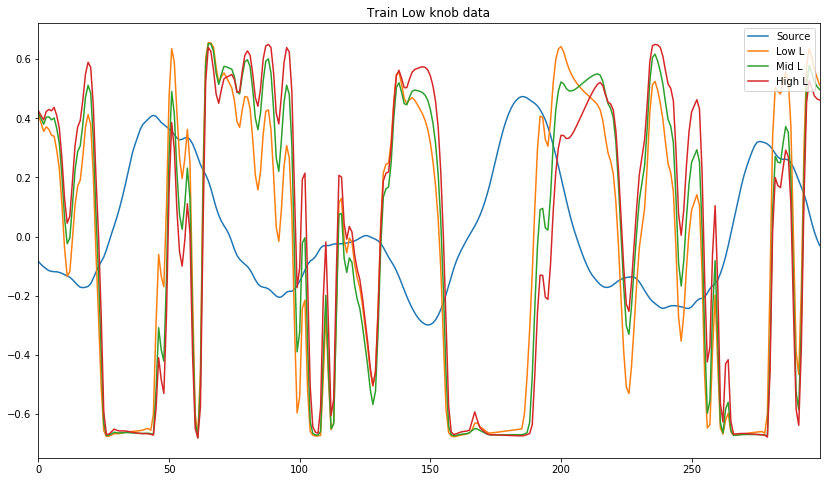

In [176]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_ll_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_tr_ll_f[start:n]).plot.line(ax=ax, label='Low L')
pd.Series(y_tr_ml_f[start:n]).plot.line(ax=ax, label='Mid L')
pd.Series(y_tr_hl_f[start:n]).plot.line(ax=ax, label='High L')
ax.legend(loc='upper right')
ax.set_title('Train Low knob data')

In [177]:
from sklearn.metrics import mean_absolute_error as mae

print('mae(l, h)', mae(y_tr_ll_f, y_tr_hl_f))
print('mae(l, m)', mae(y_tr_ll_f, y_tr_ml_f))
print('mae(m, h)', mae(y_tr_ml_f, y_tr_hl_f))

mae(l, h) 0.14057745
mae(l, m) 0.08369391
mae(m, h) 0.066935614


Text(0.5, 1.0, 'Train Mid knob data')

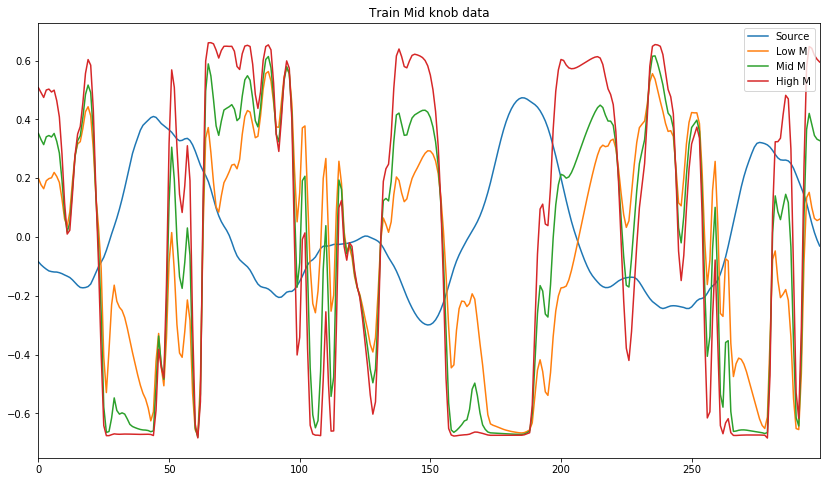

In [178]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_lm_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_tr_lm_f[start:n]).plot.line(ax=ax, label='Low M')
pd.Series(y_tr_mm_f[start:n]).plot.line(ax=ax, label='Mid M')
pd.Series(y_tr_hm_f[start:n]).plot.line(ax=ax, label='High M')
ax.legend(loc='upper right')
ax.set_title('Train Mid knob data')

In [179]:
from sklearn.metrics import mean_absolute_error as mae

print('mae(l, h)', mae(y_tr_lm_f, y_tr_hm_f))
print('mae(l, m)', mae(y_tr_lm_f, y_tr_mm_f))
print('mae(m, h)', mae(y_tr_mm_f, y_tr_hm_f))

mae(l, h) 0.22344534
mae(l, m) 0.11204029
mae(m, h) 0.11163513


Text(0.5, 1.0, 'Test data')

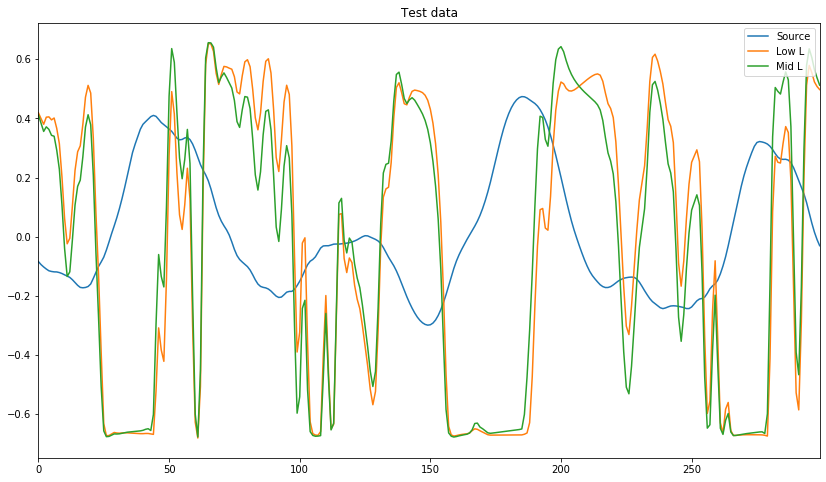

In [180]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_lm_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_te_hl_hm_f[start:n]).plot.line(ax=ax, label='Low L')
pd.Series(y_te_ll_lm_f[start:n]).plot.line(ax=ax, label='Mid L')
ax.legend(loc='upper right')
ax.set_title('Test data')

Text(0.5, 1.0, 'Test data')

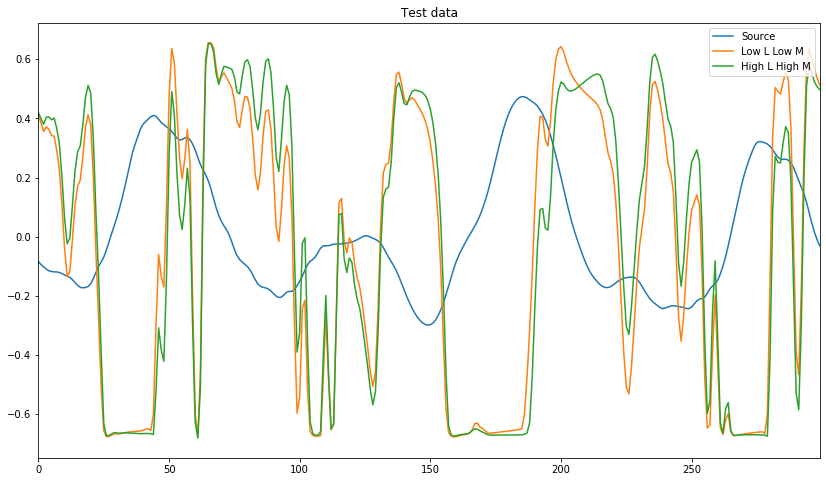

In [181]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_ll_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_te_ll_lm_f[start:n]).plot.line(ax=ax, label='Low L Low M')
pd.Series(y_te_hl_hm_f[start:n]).plot.line(ax=ax, label='High L High M')
ax.legend(loc='upper right')
ax.set_title('Test data')

In [182]:
len(X_tr_ll_f), len(X_tr_ml_f), len(X_tr_hl_f), len(X_tr_lm_f), len(X_tr_mm_f), len(X_tr_hm_f)

(99935, 99935, 99935, 99935, 99935, 99935)

In [183]:
len(y_tr_ll_f), len(y_tr_ml_f), len(y_tr_hl_f), len(y_tr_lm_f), len(y_tr_mm_f), len(y_tr_hm_f)

(99935, 99935, 99935, 99935, 99935, 99935)

In [184]:
X_tr_s = np.concatenate([X_tr_ll_f, X_tr_ml_f, X_tr_hl_f, X_tr_lm_f, X_tr_mm_f, X_tr_hm_f])
y_tr_s = np.concatenate([y_tr_ll_f, y_tr_ml_f, y_tr_hl_f, y_tr_lm_f, y_tr_mm_f, y_tr_hm_f])
     
len(X_tr_s), len(y_tr_s), np.min(X_tr_s), np.min(y_tr_s)

(599610, 599610, -0.47080904, -0.74059266)

In [185]:
X_te_s = np.concatenate([X_te_ll_lm_f, X_te_hl_hm_f])
y_te_s = np.concatenate([y_te_ll_lm_f, y_te_hl_hm_f])
     
len(X_te_s), len(y_te_s), np.min(X_te_s), np.min(y_te_s)

(199870, 199870, -0.47080904, -0.74059266)

In [186]:
X_tr_s[0][0]

array([3.051851e-05, 0.000000e+00, 5.000000e+00], dtype=float32)

## Finished data processing!

## Moving on to training NN

In [36]:
import keras
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Reshape, GRU, CuDNNGRU, GaussianNoise
from keras.layers import Convolution2D, MaxPooling2D, Layer, Input, BatchNormalization
from keras.utils import np_utils
from keras.regularizers import L1L2
from keras.layers.merge import concatenate

tf.set_random_seed(1234)

Using TensorFlow backend.


In [37]:
X_tr_s.shape, y_tr_s.shape, X_te_s.shape, y_te_s.shape

((2399226, 128, 3), (2399226,), (799742, 128, 3), (799742,))

In [38]:
y_tr_s

array([-6.1037019e-05, -3.0518509e-05, -3.0518509e-05, ...,
        4.7608875e-02,  4.8463393e-02,  4.8677024e-02], dtype=float32)

In [39]:
import math

def predict(model, X_input, batch_size=1, verbose=0):
    # X_input = np.array(rows).reshape(rows.shape[0], rows.shape[1], n_features)
    
    return np.array(
        model.predict(
#             X_input[:(math.floor(len(X_input) / batch_size) * batch_size)],
            X_input,
            batch_size=batch_size,
            verbose=verbose,
        )
    ).flatten()

In [99]:
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt
import math


# TensorBoard callback
# tensorboard_cb = keras.callbacks.TensorBoard(
#     log_dir='./logs',
#     batch_size=BATCH_SIZE,
#     # histogram_freq='batch',
#     write_graph=True,
#     write_grads=True,
#     write_images=True
# )

class PreviewLearning(keras.callbacks.Callback):
    def __init__(self, model, n_start=200, n_end=400, batch_size=1):
        self.model = model
        self.n_start = n_start
        self.n_end = n_end
        self.batch_size = batch_size
        
    def on_train_begin(self, epoch_n):
        (fig, ax) = plt.subplots(figsize=(12, 8))
        n_start = self.n_start
        n_end = self.n_end
        batch_size = self.batch_size
        
        self.fig = fig
        self.ax = ax
        
        feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_tr_s[n_start:n_end])))))

        feat_data, = ax.plot(feat.values, label='feature')

        targ = pd.Series((y_tr_s[n_start:n_end]))
        
        pred = pd.Series(np.zeros(n_end - n_start))
        pred = pred + 0.001

        zeros = pd.Series(np.zeros(n_end - n_start))
        zeros.plot.line(ax=ax, label='0')

        targ_data, = ax.plot(targ.values, label='target')

        pred_data, = ax.plot(pred.values, label='predicted')
        # pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')
        
        self.feat_data = feat_data
        self.targ_data = targ_data
        self.pred_data = pred_data
        
        ax.legend(loc='upper right')
        ax.set_title('NN predictions on first {} samples'.format(n_end-n_start))
        ax.set_xlabel('index')
        ax.set_ylabel('value')
        
        plt.show()
        fig.canvas.draw()
        
        
    def on_epoch_end(self, epoch_n, logs={}):
        loss = logs['loss']
        model = self.model
        
        fig = self.fig
        ax = self.ax
        
        n_start = self.n_start
        n_end = self.n_end
        batch_size = self.batch_size
        
        pred_range = math.ceil((n_end - n_start) / batch_size) * batch_size

        feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_tr_s[n_start:n_end])))))

        self.feat_data.set_ydata(feat.values)

        targ = pd.Series((y_tr_s[n_start:n_end]))

        pred = pd.Series(predict(model, X_tr_s[n_start:n_start + pred_range], batch_size=batch_size))[:n_end-n_start]
        pred = pred + 0.001

        self.targ_data.set_ydata(targ.values)
        self.pred_data.set_ydata(pred.values)
        
        ax.set_title('NN predictions on first {} samples, epoch {}, loss={:.4f}'.format(n_end-n_start, epoch_n, loss))
        
        fig.canvas.draw()


# Callback to display the target and prediciton
# test_model_cb = keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

In [ ]:
#     gru_1_L = GRU_L(
#         params['n_units'],
#         input_shape=(N_WINDOW_POINTS, n_features),
#         batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
# #         bias_regularizer=L1L2(l1=0.01, l2=0.01),
# #         recurrent_regularizer=L1L2(l1=0.01, l2=0.01),
#         stateful=True,
#         # reset_after=True,
#         # batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
# #         activation='tanh',
# #         recurrent_activation='hard_sigmoid',
#         # kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
#         kernel_initializer=keras.initializers.glorot_uniform(seed=43),
# #         recurrent_initializer=keras.initializers.Orthogonal(gain=1.0, seed=42),
#         recurrent_initializer=keras.initializers.glorot_uniform(seed=43),
#         # kernel_initializer='identity',
#         bias_initializer='zeros',
# #         return_sequences=True,
#     )(input_L)

In [190]:
from keras import backend as K
    
def load_model(filepath):
    model = keras.models.load_model(filepath)
    
    return model
    
    
    
def create_model(params):
    input_L = Input(
        shape=(N_WINDOW_POINTS, n_features),
        batch_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
    )

    # bn_L = (BatchNormalization()(input_L))

    GRU_L = CuDNNGRU
    
    gru_1_L = GRU_L(
        params['n_units'],
        input_shape=(N_WINDOW_POINTS, n_features),
        batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
        bias_regularizer=L1L2(l1=0.01, l2=0.01),
        recurrent_regularizer=L1L2(l1=0.01, l2=0.01),
        stateful=True,
        # reset_after=True,
        # batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         activation='tanh',
#         recurrent_activation='hard_sigmoid',
        # kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
        kernel_initializer=keras.initializers.glorot_uniform(seed=43),
#         recurrent_initializer=keras.initializers.Orthogonal(gain=1.0, seed=42),
        recurrent_initializer=keras.initializers.glorot_uniform(seed=43),
        # kernel_initializer='identity',
        bias_initializer='zeros',
#         return_sequences=True,
    )(input_L)
    
#     gru_2_L = GRU_L(
#         params['n_units'],
#         input_shape=(N_WINDOW_POINTS, n_features),
#         batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         bias_regularizer=L1L2(l1=0.01, l2=0.01),
#         recurrent_regularizer=L1L2(l1=0.01, l2=0.01),
#         stateful=True,
# #         kernel_initializer=keras.initializers.glorot_uniform(seed=43),
# #         recurrent_initializer=keras.initializers.glorot_uniform(seed=43),
#         bias_initializer='zeros',
#     )(gru_1_L)
    
    dense_2_l = Dense(
        1,
        activation=None,
        kernel_initializer='identity',
        bias_initializer='zeros',
    )(gru_1_L)
#     )(gru_2_L)


    model = Model(inputs=input_L, outputs=dense_2_l)
    
    return model

    

def train_model(model, X_tr, y_tr, x_val, y_val, params, verbose_fit=0, preview_n_start=1000, preview_n_end=2000):
    print(params)
    
    optimizer = keras.optimizers.adam(lr=params['lr'], clipvalue=10, clipnorm=10)
    # optimizer = keras.optimizers.SGD(lr=params['lr'], decay=0.2)


    # model.compile(optimizer=optimizer, loss='mse')
    model.compile(optimizer=optimizer, loss='mae')
    
    # TRAIN

    es_cb = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0005,
        patience=8,
        verbose=0,
        mode='auto',
    )

    def step_decay(epoch):
        initial_lrate = params['lr']
        drop = 0.8
        epochs_drop = 40.0
        lrate = initial_lrate * math.pow(drop,  
               math.floor((1+epoch)/epochs_drop))
        return lrate

    lrate = keras.callbacks.LearningRateScheduler(step_decay)

    preview_learning = PreviewLearning(
        model,
        n_start=preview_n_start,
        n_end=preview_n_end,
        batch_size=params['batch_size']
    )

    history = model.fit(
        X_tr_s[:params['n_samples']],
        y_tr_s[:params['n_samples']],
        batch_size=params['batch_size'],
        shuffle=False,
        epochs=params['epochs'],
        verbose=verbose_fit,
        callbacks=[es_cb, preview_learning, lrate],
#         callbacks=[es_cb, preview_learning],
    )
    
    return (history, model)


def create_and_train_model(X_tr, y_tr, x_val, y_val, params):
    model = create_model(params)

    (history, model) = train_model(
        model,
        X_tr_s,
        y_tr_s,
        X_te_s,
        y_te_s,
#         X_tr_s[:params['n_samples']],
#         y_tr_s[:params['n_samples']],
#         X_te_s[:params['n_samples']],
#         y_te_s[:params['n_samples']],
        params
    )
    
    return (history, model)


  0%|          | 0/9 [00:00<?, ?it/s]

{'batch_size': 100, 'epochs': 100, 'lr': 0.001, 'n_samples': 4700, 'n_units': 16, 'optimizer': <class 'keras.optimizers.Adam'>}


<IPython.core.display.Javascript object>


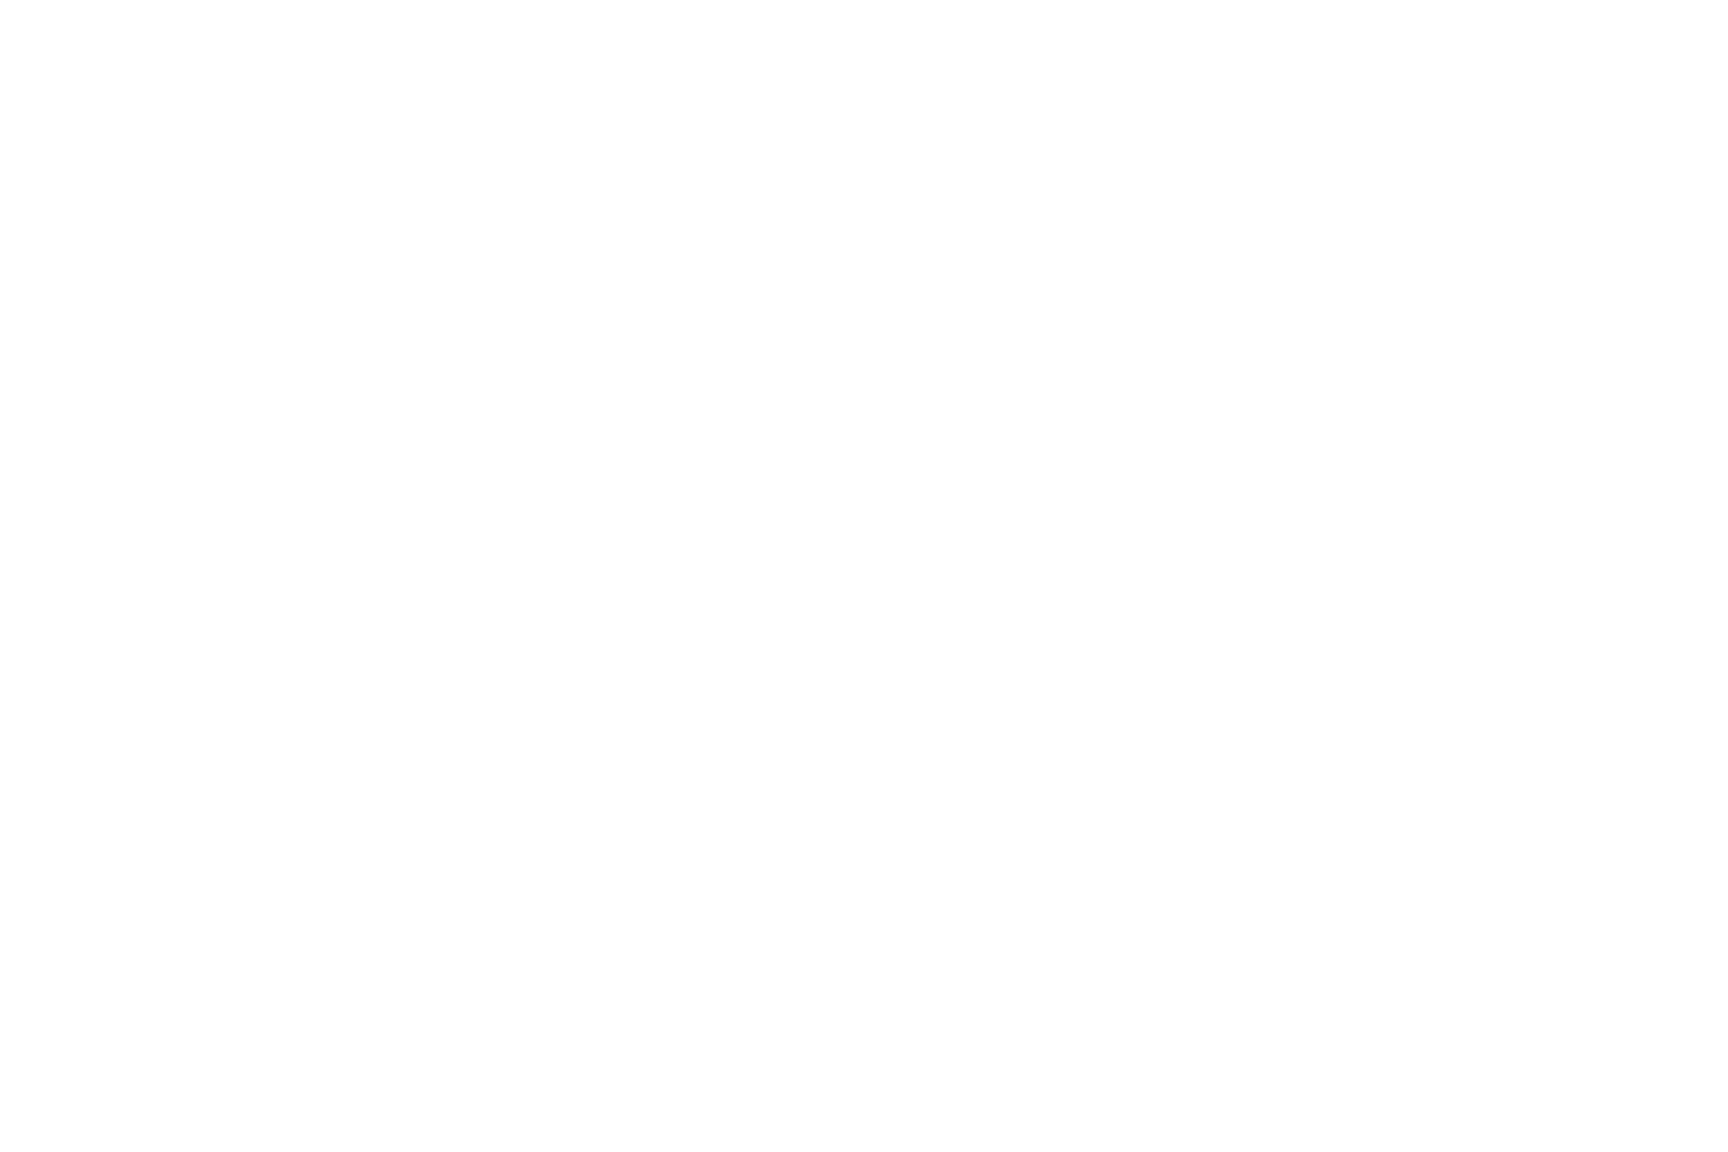

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


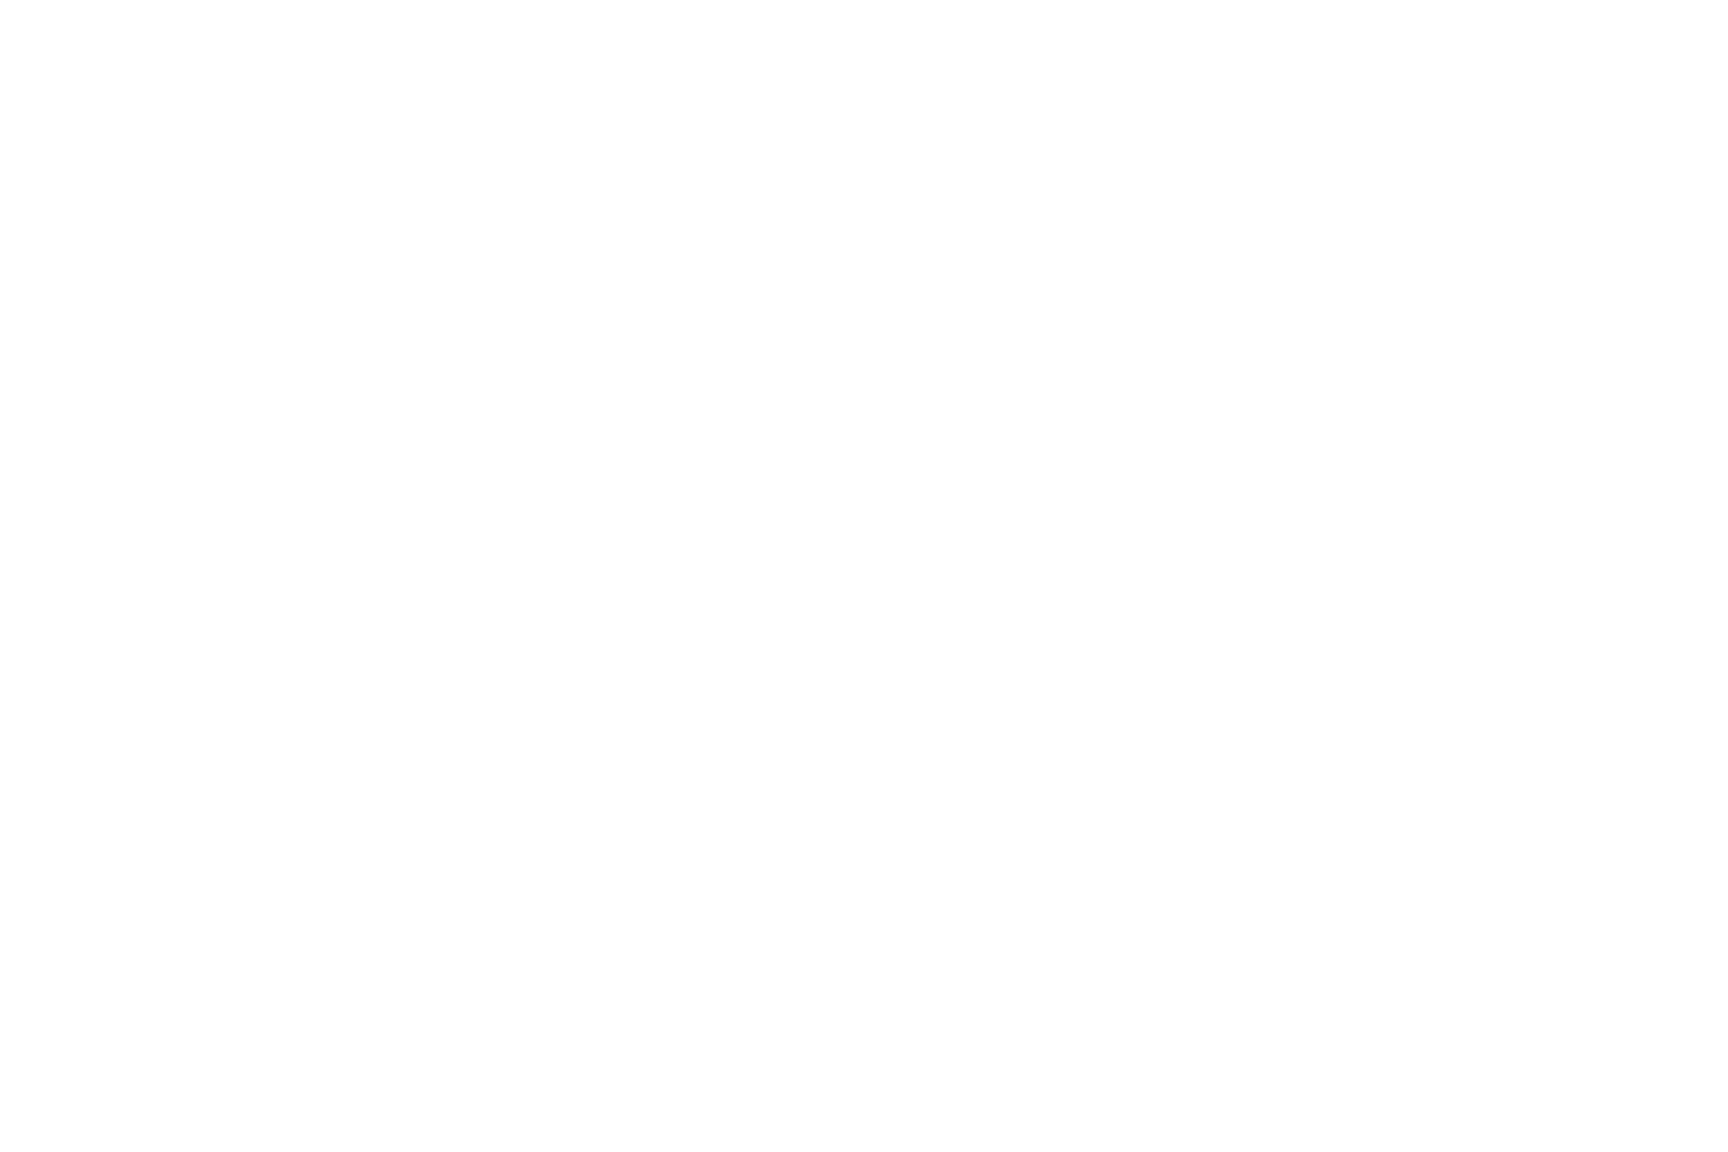

In [191]:
%matplotlib notebook

from keras.optimizers import Adam, Nadam, RMSprop
import talos as ta

p = {
     'lr': [0.001, 0.002, 0.004],
     'n_samples': [4700],
     'n_units': [16, 20, 24],
#      'batch_size': [10, 100, 1000],
     'batch_size': [100],
     'epochs': [100],
     # 'dropout': (0, 0.5, 5),
     # 'weight_regulizer':[None],
     # 'emb_output_dims': [None],
     # 'shape':['brick','long_funnel'],
     'optimizer': [Adam],
 }

# 'lr': 0.004,
# 'n_samples': 44000 * 3,
# 'n_units': 20,
# 'batch_size': 500,
# 'epochs': 100,
# 'optimizer': keras.optimizers.Adam,
        
# and run the experiment
t = ta.Scan(x=X_tr_s[:np.max(p['n_samples'])],
            y=y_tr_s[:np.max(p['n_samples'])],
            model=create_and_train_model,
#             grid_downsample=0.5,
            params=p,
            experiment_name='test')

globals().update(locals())

In [ ]:
r = ta.Reporting(t)
r.data.sort_values(by='loss')


In [ ]:
best_params = r.data.loc[7]
best_params

In [ ]:
type(best_params)

{'lr': 0.005, 'n_samples': 590000, 'n_units': 20, 'batch_size': 1000, 'epochs': 40, 'optimizer': <class 'keras.optimizers.Adam'>}


<IPython.core.display.Javascript object>


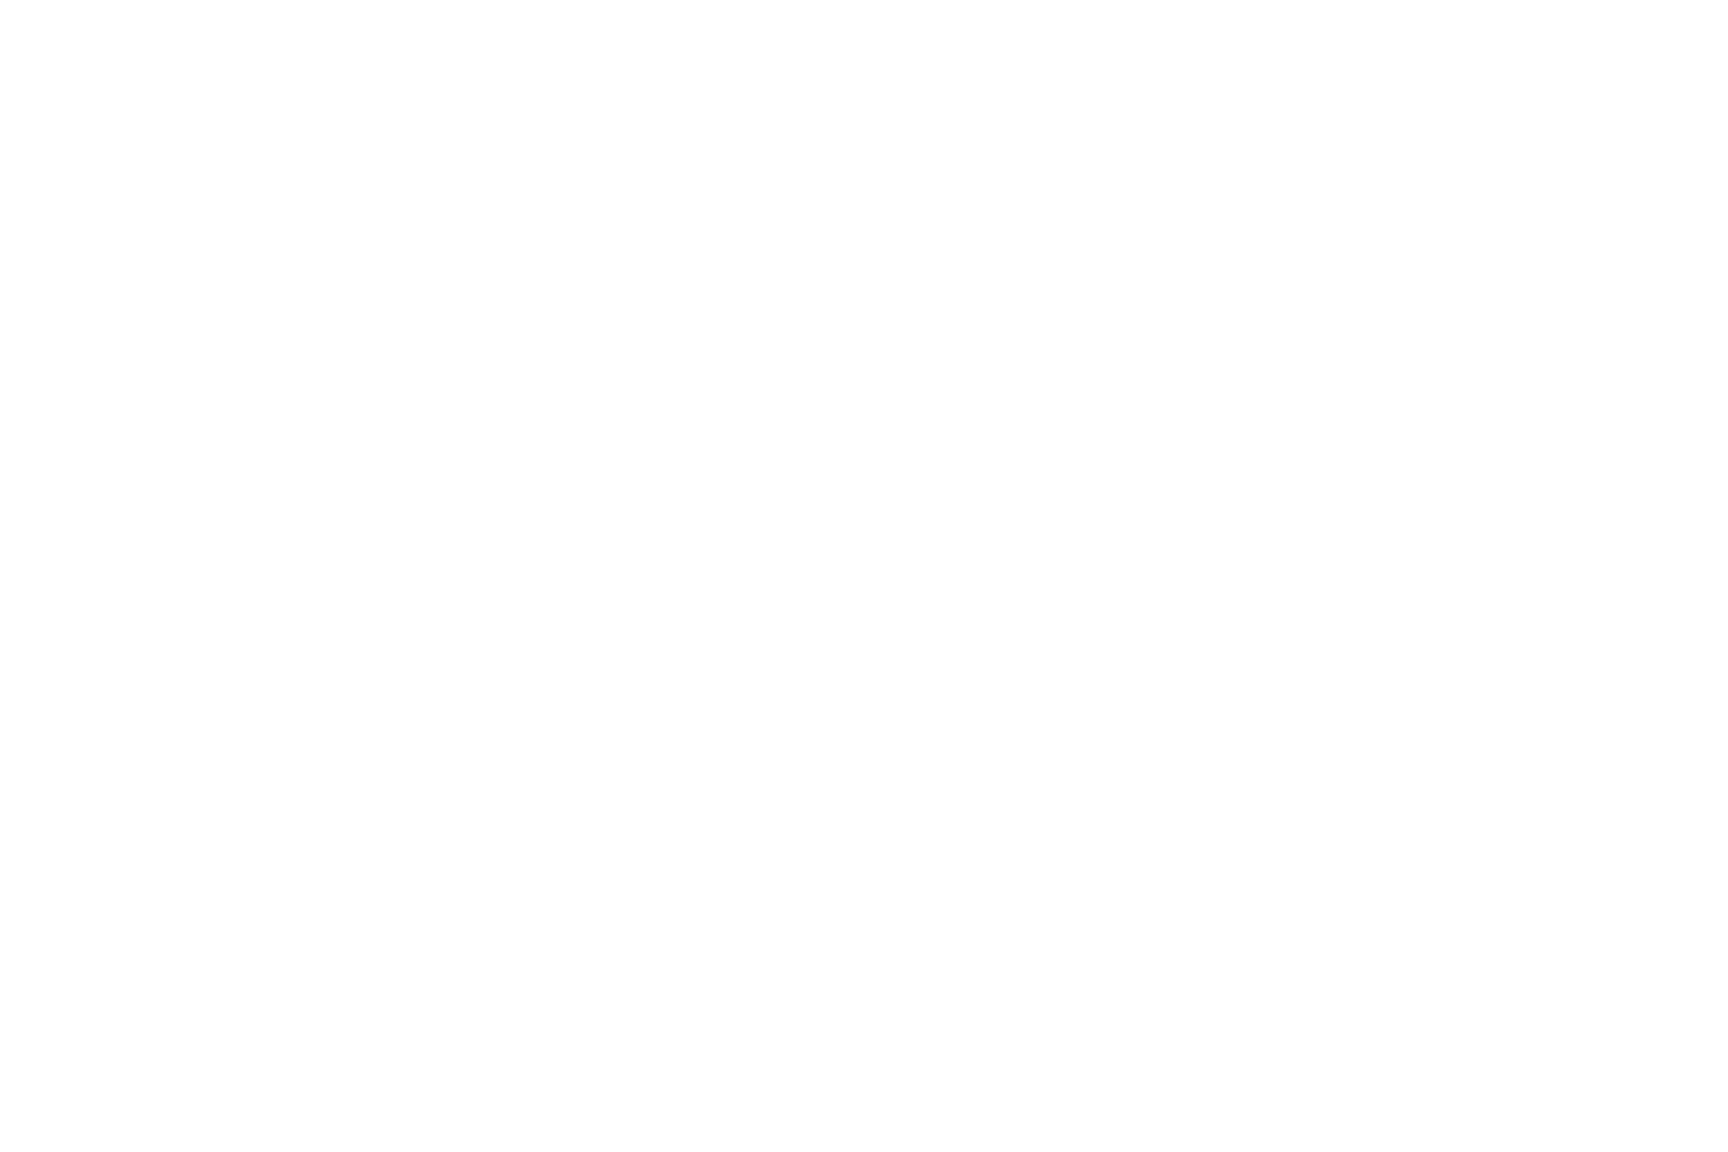

Epoch 1/40
590000/590000 [==============================] - 14s 24us/step - loss: 0.4012
Epoch 2/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1620
Epoch 3/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1517
Epoch 4/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1476
Epoch 5/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1327
Epoch 6/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1398
Epoch 7/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1326
Epoch 8/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1374
Epoch 9/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1347
Epoch 10/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1332
Epoch 11/40
590000/590000 [==============================] - 5s 9us/step - loss: 0.1311
Epoch 12/40
590000/590000 [============

<IPython.core.display.Javascript object>


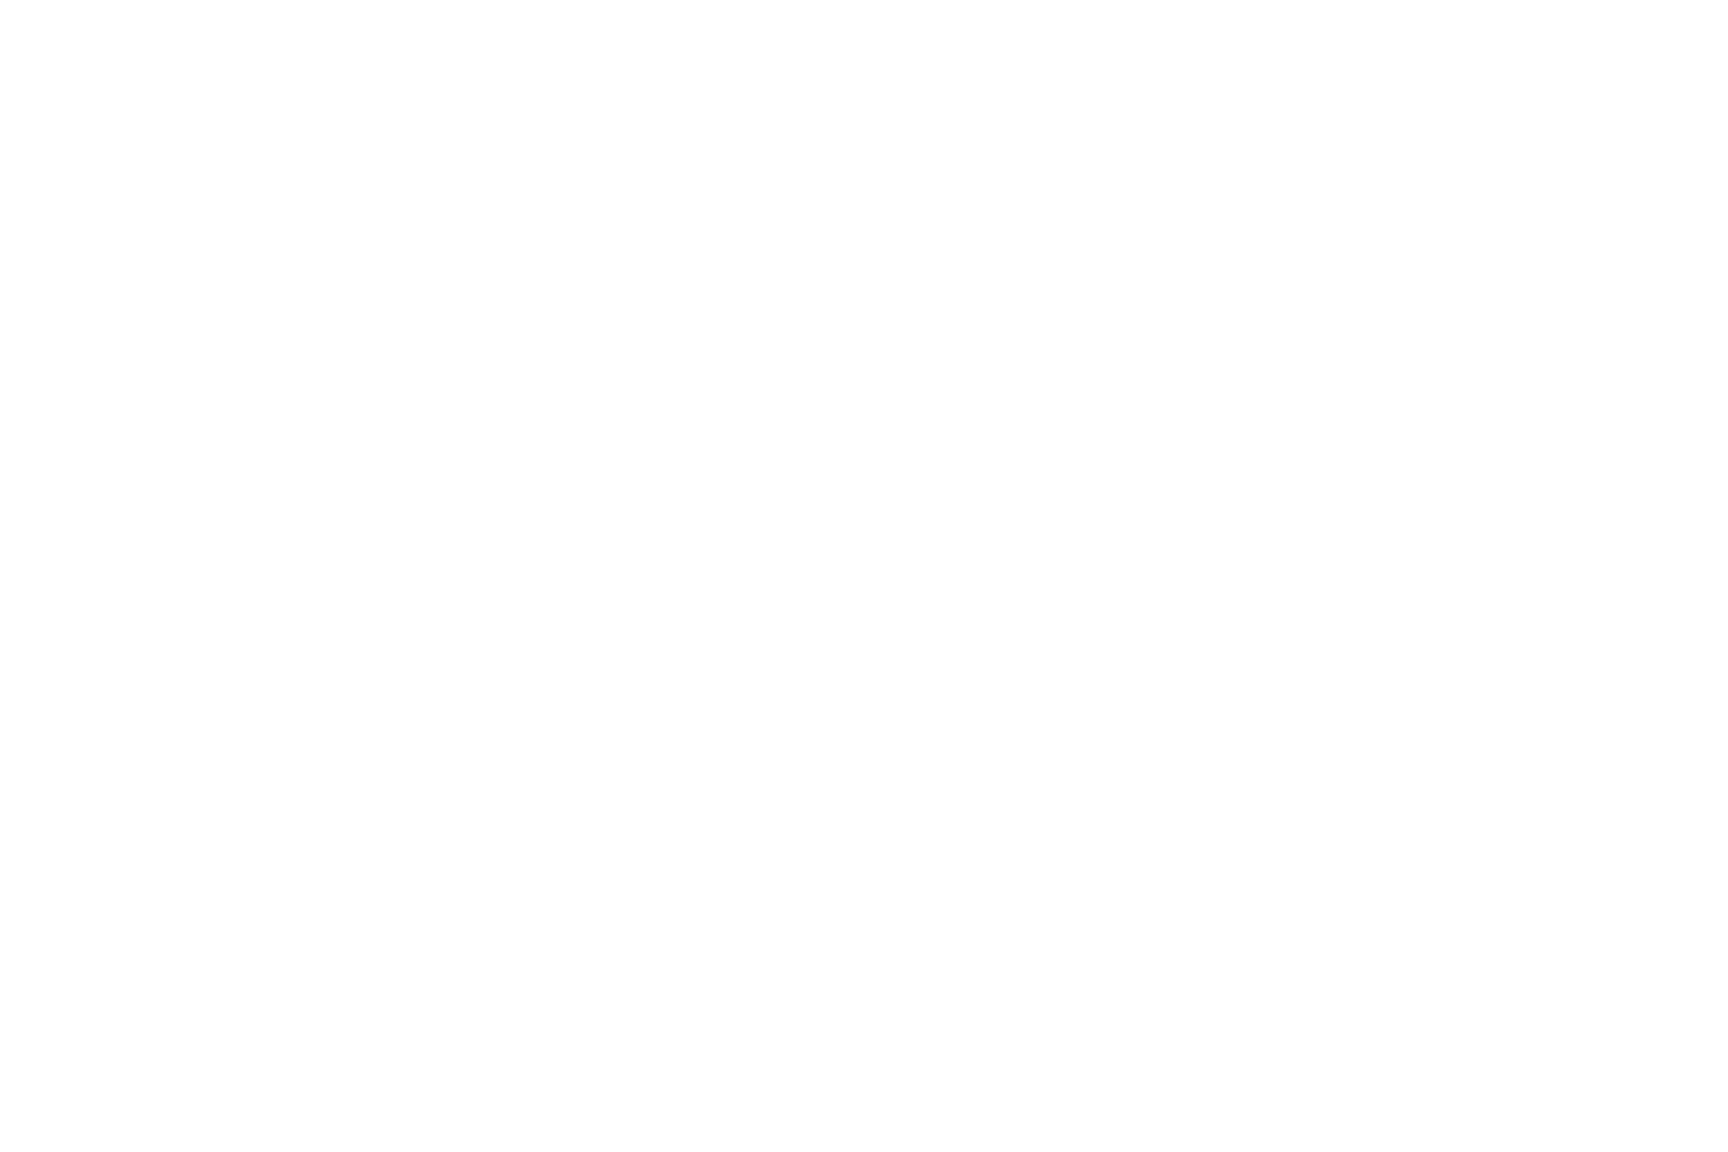

In [192]:
%%time
%matplotlib notebook

best_params = {
#     'lr': 0.0005,
#     'lr': 0.01,
    'lr': 0.005,
#     'n_samples': 18800,
#     'n_samples': 263000,
#     'n_samples': 2399000,
    'n_samples': 590000,
    'n_units': 20,
#     'n_units': 40,
    'batch_size': 1000,
#     'epochs': 100,
    'epochs': 40,
    'optimizer': keras.optimizers.Adam,
}


# model = load_model('saved_models/02_peak_comp_60_samples_180_params.h5')
model = create_model(best_params)

history, model = train_model(
    model,
    X_tr_s[:best_params['n_samples']],
    y_tr_s[:best_params['n_samples']],
    X_te_s[:best_params['n_samples']],
    y_te_s[:best_params['n_samples']],
    best_params,
    verbose_fit=1,
    preview_n_start=14000,
    preview_n_end=15000,
)

globals().update(locals())

In [193]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)
    print('='*20)

[]
[array([[-7.3067665e-01, -1.6964498e+00, -2.7079380e+00,  1.4913445e+00,
        -3.6058803e-03,  2.1333797e-01, -3.5855238e+00, -3.3737561e-01,
        -1.3207574e+00, -9.2879176e-01, -1.3010087e-02,  2.2540541e-01,
        -1.4299253e+00, -2.5179997e-01, -2.2042646e+00, -5.0552440e+00,
        -2.2585863e-01, -3.2704678e+00, -2.0908930e+00,  7.4397880e-01,
        -1.9205657e-01, -5.2243751e-01, -1.5220592e+00, -8.5270494e-01,
        -1.2549347e+00, -1.7961822e+00, -3.4935316e-01, -7.6461428e-01,
        -1.2724397e+00, -4.8487493e-01, -1.1992334e+00, -1.6351171e+00,
         7.2727853e-01, -1.2032712e+00, -1.1737897e+00, -3.5208473e-01,
        -1.7684822e+00, -1.8646626e+00,  9.3295825e-01, -1.3379896e+00,
        -2.9377315e+00,  5.1263440e-01,  2.3446815e-01,  7.2998648e+00,
        -3.4131363e-02,  1.2975328e-02, -3.1978896e+00, -2.8182122e-01,
         3.5468647e-01,  4.4666047e+00,  1.1399166e-01, -9.0443948e-03,
        -2.8093400e+00, -6.1899167e-01, -5.1132125e-01, -6.9

In [194]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        (1000, 64, 3)             0         
_________________________________________________________________
cu_dnngru_125 (CuDNNGRU)     (1000, 20)                1500      
_________________________________________________________________
dense_42 (Dense)             (1000, 1)                 21        
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [51]:
# model.save('saved_models/02_peak_comp_60_samples_180_params.h5')

In [196]:
score = model.evaluate(X_te_s[:199000], y_te_s[:199000], verbose=0, batch_size=best_params['batch_size'])
score

0.5747077260447208

In [42]:
0.1430590125421683
0.040487171824161824

0.040487171824161824

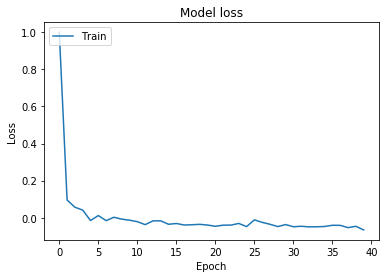

In [197]:
%matplotlib inline

from matplotlib import pyplot as plt

# Plot training & validation loss values
plt.plot(normalize(np.array(history.history['loss'])))
# plt.plot(normalize(np.array(history.history['val_loss'])))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [198]:
len(X_te_s)

199870

In [202]:
pred = predict(model, X_te_s[:199000], batch_size=best_params['batch_size'])
ipd.Audio(pred, rate=44000)

In [59]:
print(X_tr_s[0][-1])

[ 0. -5.  0.]


0   -0.123878
1   -0.089809
2   -0.036826
3    0.033925
4    0.118895
dtype: float32


Text(0, 0.5, 'value')

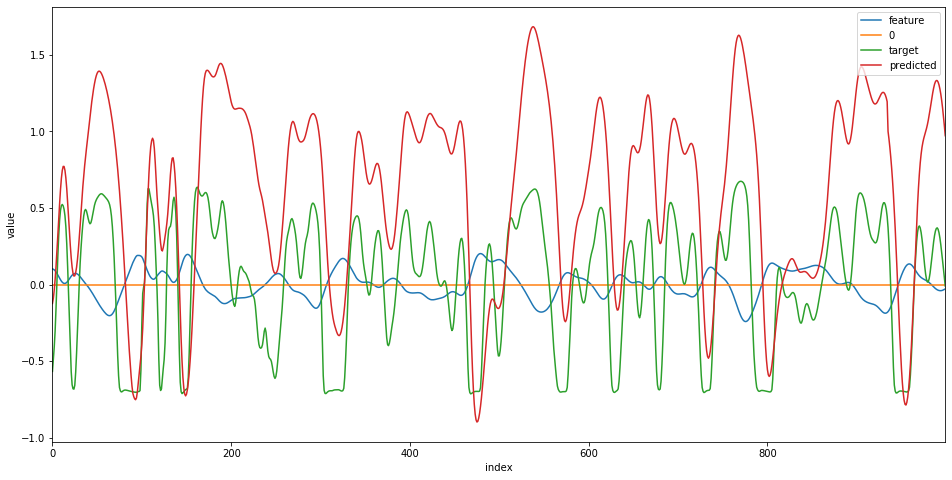

In [207]:
%matplotlib inline
from scipy.signal import savgol_filter

(fig, ax) = plt.subplots(figsize=(16, 8))

I = 1000
MAGIC_OFFSET = 180000
OFFSET = int(MAGIC_OFFSET)

X_to_test = X_te_s
y_to_test = y_te_s

feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_to_test[:(I + OFFSET)]))))[OFFSET:])

feat.plot.line(ax=ax, label='feature')

targ = pd.Series(y_to_test[OFFSET:(I + OFFSET)])

pred = pd.Series(predict(model, X_to_test[:(I + OFFSET)], batch_size=best_params['batch_size'])[OFFSET:])
# pred = (pred * 3.2) + 0.001
pred = pred + 0.001

zeros = pd.Series(np.zeros(I))
zeros.plot.line(ax=ax, label='0')

targ.plot.line(ax=ax, label='target')

print(pred[:5])

pred.plot.line(ax=ax, label='predicted')
# pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')

# pd.Series(normalize(np.array(list(map(lambda w: w[-1], X_te_f[:I]))))).plot.line(ax=ax, label='feature')

ax.legend(loc="upper right")
ax.set_xlabel('index')
ax.set_ylabel('value')

In [205]:
%matplotlib inline

def plot_params(l, m):
    (fig, ax) = plt.subplots(figsize=(16, 8))

    I = 1000
    MAGIC_OFFSET = 180000
    OFFSET = int(MAGIC_OFFSET)

    X_source = np.array(list(map(lambda x: [x, l, m], source_df[OFFSET:(I + OFFSET + N_WINDOW_POINTS + 1)] / MAX_VALUE)))
    (X, _) = make_windows(X_source, [0] * (I + N_WINDOW_POINTS + 1), N_WINDOW_POINTS)
    X_to_test = X
    

    feat = source_df[OFFSET:(I + OFFSET)].reset_index()['L'] / MAX_VALUE
    
    feat.plot.line(ax=ax, label='feature')

#     targ = pd.Series(y_to_test[OFFSET:(I + OFFSET)])
    
    pred = pd.Series(predict(model, X_to_test, batch_size=best_params['batch_size']))
    # pred = (pred * 3.2) + 0.001
    pred = pred + 0.001
    
    zeros = pd.Series(np.zeros(I))
    zeros.plot.line(ax=ax, label='0')

#     targ.plot.line(ax=ax, label='target')

    pred.plot.line(ax=ax, label='predicted')
    
    ax.legend(loc="upper right")
    ax.set_xlabel('index')
    ax.set_ylabel('value')

In [156]:
from ipywidgets import interact

interact(plot_params, l=(0, 10), m=(0, 10))

interactive(children=(IntSlider(value=5, description='l', max=10), IntSlider(value=5, description='m', max=10)…

<function __main__.plot_params(l, m)>

In [215]:
layer = model.layers[0]

In [222]:
output = layer.get_output_at(node_index=0)

In [ ]:
output.

In [212]:
get_activations(model, model.layers[0], X_te_s[180000:181000])

TypeError: `outputs` of a TensorFlow backend function should be a list or tuple.


## Evaluating performance

In [114]:
# X_to_repeat = X_tr_s[:int(44000 * 2.8)]
# X_to_pred = np.concatenate([X_to_repeat, X_to_repeat, X_to_repeat])
# len(X_to_pred) / 44000, X_to_pred[0][:4], X_to_pred[1][:4]

In [61]:
def mapper(a):
    i = a[0]
    row = a[1]
    
    t = i / len(X_to_pred)
    gain = 1.0 * (1 - t) + 6.4 * t
    
    return np.array(list(map(lambda x: [x[0], gain], row)))

# X_to_pred = np.array(list(map(mapper, enumerate(X_to_pred))))

# X_to_pred[0][:5], X_to_pred[1][:5], X_to_pred[-2][:5], X_to_pred[-1][:5]

In [67]:
X_to_pred = X_tr_s[:(X_tr_s.shape[0] // best_params['batch_size']) * best_params['batch_size']]

In [68]:
predictions = predict(model, X_to_pred, batch_size=best_params['batch_size'], verbose=1)
len(predictions), predictions[:10], np.max(predictions), np.min(predictions)

263000/263000 [==============================] - 1s 3us/step


(263000,
 array([-0.05937488, -0.0590545 , -0.05882681, -0.05877836, -0.05880947,
        -0.05874747, -0.05854729, -0.05837908, -0.0582295 , -0.05822694],
       dtype=float32),
 1.0069656,
 -1.3094412)

In [69]:
np.min(y_te_s)

-0.74059266

In [70]:
predictions_n = np.clip((predictions / 1.2) * 0.8, -1.0, 1.0) * MAX_VALUE
len(predictions_n), predictions_n[:10], np.max(predictions_n), np.min(predictions_n)

(263000, array([-1297.0243, -1290.0258, -1285.052 , -1283.9937, -1284.6731,
        -1283.3188, -1278.9459, -1275.2715, -1272.004 , -1271.948 ],
       dtype=float32), 21996.826, -28604.305)

In [71]:
wavfile.write('output/pred_out_gr_jump_head_gain_2_params_v3.wav', source_fs, predictions)

In [128]:
len(predictions) / 44000

1.9772727272727273